# Import Dependencies and Read in Data

In [1]:
#import dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
# read in csv data

# create filepath
file_to_load = "heart.csv"

#store data in dataframe
heart_df = pd.read_csv(file_to_load)

#preview dataframe

heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Machine Learning Part One: Heart Disease Predictions with a Random Forest Model

In [3]:
# split data for training and validation

heart_data =  heart_df.copy()

y = heart_data.target

X = heart_data.drop(['target'], axis=1)


train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [4]:
#create and fit a random forest model

rf_model = RandomForestRegressor(random_state=1)

rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [5]:
# run model on validation data and find mean absolute error

rf_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_predictions, val_y)

print(rf_val_mae)

0.044241245136186776


# Machine Learning Part Two: Heart Disease Predictions with XGBoost

In [6]:
# create a model using XGBoost

xgb_model = XGBRegressor(n_estimators = 1000, learning_rate = 0.1, random_state=1)

# Fit the model

xgb_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(val_X, val_y)], 
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=16, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [7]:
# run model on validation data and find mean absolute error

xgb_predictions = xgb_model.predict(val_X)
xgb_val_mae = mean_absolute_error(xgb_predictions, val_y)

print(xgb_val_mae)

0.0031587081465931635


# Machine Learning Parts One and Two Analysis
### Based on the mean absolute error for each of the models above, it is clear that the model using XGBoost performed significantly better at predicting the presence of heart disease in the patients included in this dataset. The bar plot below shows a stark difference between the MAE of the Random Forest Model compared to the MAE of the XGBoost model.

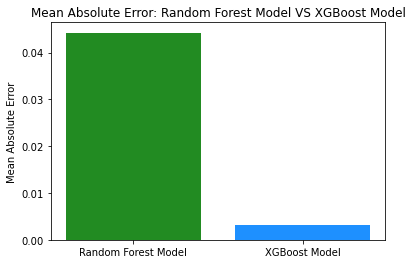

In [8]:
#visualize the difference in mean absolute error between the two models
x_axis = ["Random Forest Model", "XGBoost Model"]
y_axis = [rf_val_mae, xgb_val_mae]

plt.bar(x_axis, y_axis, color=['forestgreen', 'dodgerblue'])
plt.title("Mean Absolute Error: Random Forest Model VS XGBoost Model")
plt.ylabel('Mean Absolute Error')
plt.show()


In [9]:
validation_df = pd.DataFrame(val_X,)
validation_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3


In [10]:
validation_df['target'] = val_y

In [11]:
validation_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0


In [12]:
predictions_df = validation_df.copy()

In [13]:
predictions_df['rf'] = rf_predictions
predictions_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,rf
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0,0.01
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1,1.00
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1,1.00
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0,0.22
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0,0.01


In [14]:
predictions_df['xgb'] = xgb_predictions
predictions_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,rf,xgb
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0,0.01,-0.002040
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1,1.00,1.000371
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1,1.00,0.993064
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0,0.22,0.000202
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0,0.01,0.000127
